In [1]:
import pickle
import matplotlib.pyplot as plt

In [2]:
with open("2006_with_previous_filtering.txt", "r") as infile:
        filtered_IDs = infile.read().replace("\n","").split(",")
        filtered_IDs = set([int(bmrb_id) for bmrb_id in filtered_IDs])


In [3]:
len(filtered_IDs)

479

In [4]:
with open("chemical_shifts.pkl", "rb") as infile:
        chemical_shifts = pickle.load(infile)
        bmrb_ids = set(list(chemical_shifts))

In [5]:
filtered_chemical_shifts = list(filtered_IDs.intersection(bmrb_ids))

In [6]:
len(filtered_chemical_shifts)

479

# H-Shifts

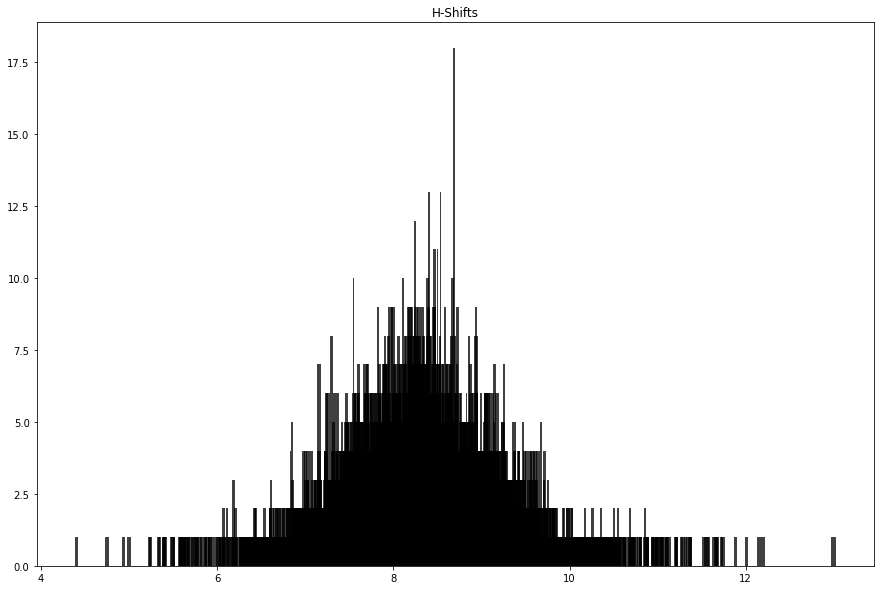

In [7]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].X_shift, 150, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("H-Shifts")
plt.show()

## Filtering

In [8]:
H_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].X_shift) > 11 or min(chemical_shifts[bmrb_id].X_shift) < 6:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].X_shift), "min --> ", min(chemical_shifts[bmrb_id].X_shift))
        H_to_large_or_small.append(bmrb_id)

6160 : max -->  11.227 min -->  7.187
6176 : max -->  9.78 min -->  4.92
6189 : max -->  10.082 min -->  5.652
4184 : max -->  10.74 min -->  4.98
6254 : max -->  11.388 min -->  7.168
6259 : max -->  11.22 min -->  6.972
6266 : max -->  9.528 min -->  5.81
6272 : max -->  9.46 min -->  5.38
6295 : max -->  12.026 min -->  6.307
4265 : max -->  11.58 min -->  6.05
6313 : max -->  11.06 min -->  6.72
6337 : max -->  11.016 min -->  6.135
4312 : max -->  11.67 min -->  6.36
6365 : max -->  10.98 min -->  5.59
4342 : max -->  9.7 min -->  4.38
6390 : max -->  11.76 min -->  6.38
6393 : max -->  11.15 min -->  6.56
4397 : max -->  9.81 min -->  5.33
6448 : max -->  9.987 min -->  5.404
6475 : max -->  10.746 min -->  5.221
4428 : max -->  10.64 min -->  5.93
4497 : max -->  11.68 min -->  6.83
6549 : max -->  11.54 min -->  6.34
6597 : max -->  11.121 min -->  6.175
4553 : max -->  10.43 min -->  5.48
6615 : max -->  11.56 min -->  6.541
4588 : max -->  9.54 min -->  5.62
4589 : max -->  1

In [9]:
keys = filtered_chemical_shifts.copy()

In [10]:
len(keys)

479

In [11]:
for bmrb_id in H_to_large_or_small:
    keys.remove(bmrb_id)

In [12]:
len(H_to_large_or_small)

77

# N-Shifts

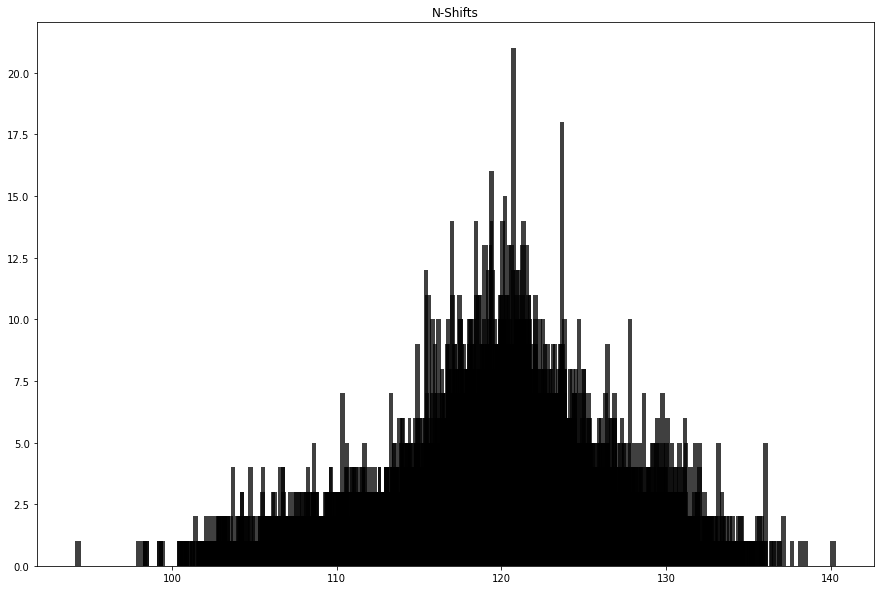

In [13]:
plt.figure(figsize=(15,10))
for bmrb_id in filtered_chemical_shifts:
    plt.hist(chemical_shifts[bmrb_id].Y_shift, 100, density=False, alpha=0.75, histtype="stepfilled", color="black")
plt.title("N-Shifts")
plt.show()

## Filtering

In [14]:
N_to_large_or_small = []
for bmrb_id in filtered_chemical_shifts:
    if max(chemical_shifts[bmrb_id].Y_shift) > 140 or min(chemical_shifts[bmrb_id].Y_shift) < 90:
        print(bmrb_id, ":", "max --> ",max(chemical_shifts[bmrb_id].Y_shift), "min --> ", min(chemical_shifts[bmrb_id].Y_shift))
        N_to_large_or_small.append(bmrb_id)

5060 : max -->  140.3 min -->  105.1


In [15]:
for bmrb_id in N_to_large_or_small:
    if bmrb_id not in H_to_large_or_small:
        print(bmrb_id)
        keys.remove(bmrb_id)

5060


In [16]:
len(keys)

401

In [17]:
keys[:10]

[6150, 6152, 6158, 6161, 6172, 6173, 4129, 6177, 6179, 6180]

In [18]:
len(N_to_large_or_small)

1

---

In [19]:
with open("2006_filtered_by_shifts.txt", "w") as outfile:
    outfile.writelines(",".join(map(str, keys)))